# Task 2.1 - Damage Classifer


In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# Loading Dependencies

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator #
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Loading Datasets

In [3]:

train_data_path = "training"
test_data_path = "validation"

size of image (h x w) 218 231


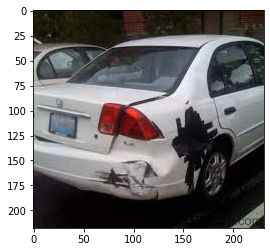

In [4]:

img = plt.imread(os.path.join(train_data_path, "00-damage/0008.JPEG"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

size of image (h x w) 194 259


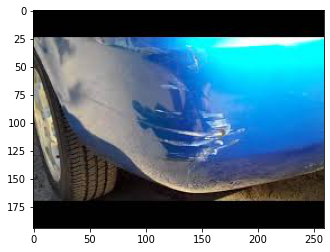

In [5]:
img = plt.imread(os.path.join(train_data_path, "00-damage/0027.JPEG"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

# Data Preperation
Since all the images in the dataset are of different sizes so we have to resize them, here i am resizing it to 150x150

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(train_data_path,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory(test_data_path,
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [7]:

test_dataset.class_indices

{'00-damage': 0, '01-whole': 1}

# Model Building

Here i am using CNN for the binary classification

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
# using CNN 
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Training Model

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [19]:
history = model.fit(train_dataset, 
                    validation_data=test_dataset,
                    epochs=20,
                    #callbacks=[earlystop,modelcheck],
                    batch_size=32)


Epoch 1/20
58/58 [==============================] - 22s 390ms/step - loss: 0.5617 - accuracy: 0.7114 - val_loss: 0.5840 - val_accuracy: 0.7022
Epoch 2/20
58/58 [==============================] - 22s 384ms/step - loss: 0.5073 - accuracy: 0.7467 - val_loss: 0.5318 - val_accuracy: 0.7457
Epoch 3/20
58/58 [==============================] - 25s 440ms/step - loss: 0.4612 - accuracy: 0.7902 - val_loss: 0.5064 - val_accuracy: 0.7630
Epoch 4/20
58/58 [==============================] - 22s 374ms/step - loss: 0.4049 - accuracy: 0.8245 - val_loss: 0.4827 - val_accuracy: 0.7696
Epoch 5/20
58/58 [==============================] - 25s 425ms/step - loss: 0.3434 - accuracy: 0.8549 - val_loss: 0.4493 - val_accuracy: 0.7804
Epoch 6/20
58/58 [==============================] - 26s 441ms/step - loss: 0.2742 - accuracy: 0.8853 - val_loss: 0.4514 - val_accuracy: 0.7935
Epoch 7/20
58/58 [==============================] - 27s 458ms/step - loss: 0.2410 - accuracy: 0.9016 - val_loss: 0.4529 - val_accuracy: 0.8087

# Model Evaluation

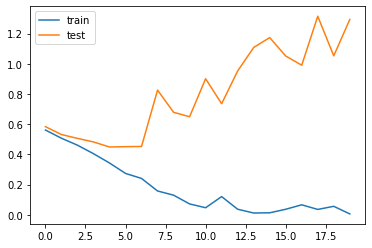

In [20]:
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend()
plt.show()

In [21]:
print('Test accuracy achieved', history.history['val_accuracy'][-2])

Test accuracy achieved 0.7760869860649109


# Making Prediction

In [22]:

def predictImage(filename):
    
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)


[[1.]]


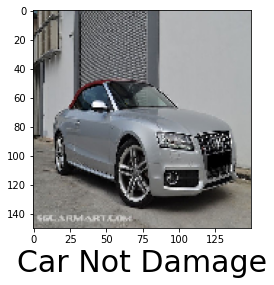

In [23]:
predictImage("validation/01-whole/0029.jpg")

[[0.]]


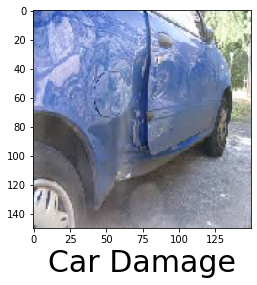

In [24]:
predictImage("validation/00-damage/0029.JPEG")